# Language localization for EA's _FIFA_
---
![](/unsplash.jpg)
_Photo by JESHOOTS.COM on Unsplash_

> __Language localization__ _is the process of adapting a product's translation to a specific country or region. It is the second phase of a larger process of product translation and cultural adaptation (for specific countries, regions, cultures or groups) to account for differences in distinct markets, a process known as internationalization and localization. <br><br>
The localization process is most generally related to the cultural adaptation and translation of software, video games, and websites, as well as audio/voiceover, video, or other multimedia content, and less frequently to any written translation (which may also involve cultural adaptation processes). Localization can be done for regions or countries where people speak different languages or where the same language is spoken._

## 0. FIFA languages
---

According to the official site, [FIFA 20](https://www.ea.com/games/fifa/fifa-20) is currently playable in the following __21__ languages, with region-specific commentary provided:
> _Arabic, Czech, Danish, German (Germany), English (American), Spanish (Spain), Spanish (Mexico), French (France), Italian, Japanese, Korean, Dutch, Norwegian, Polish, Portuguese (Brazil), Portuguese (Portugal), Russian, Swedish, Turkish, Chinese (simplified), Chinese (traditional)._ 

However, this is only a small set of the worldwide player's languages. And thus, one of the goals for [Electronic Arts (EA)](https://www.ea.com) in the near future is to add new languages to upcoming versions of the video game for countries where it is (or it may be) highly played.

Given that we don't have official statistical data for the playability of the game, we need to make use of public datasets and social media data.

#### Countries/languages dataset

Along the analysis, we will need a relation of the languages spoken in each country. For this, we will load an already constructed dataset containing data of all the countries.

In [1]:
import pandas as pd

countries_lang = pd.read_csv('Countries/countries_lang_full.csv', index_col=0)
countries_lang.head(10)

,Country_name,Phone_code,Continent,Capital,Currency,Country_code,Languages
0,Andorra,376,Europe,Andorra la Vella,EUR,AND,Catalan
1,United Arab Emirates,971,Asia,Abu Dhabi,AED,ARE,Arabic
2,Afghanistan,93,Asia,Kabul,AFN,AFG,Pashto
3,Afghanistan,93,Asia,Kabul,AFN,AFG,Uzbek
4,Afghanistan,93,Asia,Kabul,AFN,AFG,Turkmen
5,Antigua and Barbuda,1268,America,Saint John's,XCD,ATG,English
6,Anguilla,1264,America,The Valley,XCD,AIA,English
7,Albania,355,Europe,Tirana,ALL,ALB,Albanian
8,Armenia,374,Asia,Yerevan,AMD,ARM,Armenian
9,Armenia,374,Asia,Yerevan,AMD,ARM,Russian


Independently of the region, the languages already available in the FIFA 20 cover most of the countries in the world. To see this, we take ```countries_lang``` and filter the countries where the FIFA 20 languages are spoken:

In [2]:
langs_in_fifa20 = ['Arabic', 'Czech', 'Danish', 'German', 'English', 'Spanish', 
                   'French', 'Italian', 'Japanese', 'Korean', 'Dutch', 
                   'Norwegian', 'Polish', 'Portuguese', 'Russian', 'Swedish', 
                   'Turkish', 'Chinese']

# filter countries
countries_in_fifa20 = pd.DataFrame(columns=countries_lang.columns)
for lang in langs_in_fifa20:
    df = countries_lang[countries_lang.Languages==lang]
    countries_in_fifa20 = countries_in_fifa20.append(df, ignore_index=False)
countries_in_fifa20.reset_index(drop=True, inplace=True)

In [3]:
import plotly.express as px

# show countries in a map
# colors can be found in https://plotly.com/python/discrete-color/
fig = px.choropleth(countries_in_fifa20, locations="Country_code", 
                    hover_name="Country_name", color='Languages', 
                    scope='world', 
                    color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

/Users/hramirez/Library/Python/3.7/lib/python/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



We can see that except for the Balkanic area, the Southeast Asia, and a couple of other countries, most of the world is fairly covered.

Therefore, we could direct the analysis towards __a)__ studying the countries left out or __b)__ looking into regional-specific cases; _e.g._, there are Spanish versions for Mexico and Spain but only one English (American) version.

## 1. FIFA 20 dataset
---

The FIFA 20 players dataset can be obtained from this Kaggle [repository](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv). As the description states, the dataset contains

* 100+ attributes
* URL of the scraped player
* Player positions, with the role in the club and in the national team
* Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
* Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.

In [4]:
fifa20_data = pd.read_csv('FIFA data/players_20.csv', index_col=0)
fifa20_data.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


> We can see that the dataset contains 103 columns and 18278 entries (_i.e._, players).

In [5]:
fifa20_data.shape

(18278, 103)

In [6]:
fifa20_data.columns[:100]

Index(['player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
     

According to the repository, the data was scrapped from [SoFIFA](https://sofifa.com). Therefore, the first and second columns are the player's SoFIFA id and url respectively. 

Multiple kinds of analyses can be performed from this dataset. For the purposes of this analysis, however, we may only need a player's _nationality_ and _club_. Let's also keep the _short name_ for identification, and the _overall_ and _international reputation_ scores in case they provide some insights.

In [7]:
#%%time
import country_converter as coco

fifa20 = fifa20_data.copy()
fifa20 = fifa20[['short_name', 'nationality', 'club', 'overall', 
                 'international_reputation']]
fifa20.reset_index(drop=True, inplace=True)
fifa20.index.rename('id', inplace=True)
# change name to standard name
uk_countries = ['England', 'Scotland', 'Wales', 'Northern Ireland']
fifa20['nationality'] = fifa20.nationality.apply(lambda x: 'United Kingdom' 
                                                 if x in uk_countries else x)
fifa20['nationality'] = fifa20.nationality.apply(lambda x: 'Ireland' 
                                                 if x=='Republic of Ireland' 
                                                 else x)
nationalities = fifa20['nationality'].tolist()
fifa20['nationality'] = coco.convert(names=nationalities, to='name_short')
fifa20.columns = ['Name', 'Nationality', 'Club', 'Score', 
                  'International_reputation']
fifa20.head(10)

,Name,Nationality,Club,Score,International_reputation
id,,,,,
0,L. Messi,Argentina,FC Barcelona,94,5
1,Cristiano Ronaldo,Portugal,Juventus,93,5
2,Neymar Jr,Brazil,Paris Saint-Germain,92,5
3,J. Oblak,Slovenia,Atlético Madrid,91,3
4,E. Hazard,Belgium,Real Madrid,91,4
5,K. De Bruyne,Belgium,Manchester City,91,4
6,M. ter Stegen,Germany,FC Barcelona,90,3
7,V. van Dijk,Netherlands,Liverpool,90,3
8,L. Modrić,Croatia,Real Madrid,90,4


### 1.1 Adding languages
---

We will now extend the dataframe by adding a _Languages_ column taken from the ```countries_lang``` dataset from above.

In [8]:
union = fifa20.merge(countries_lang, how='left', left_on='Nationality', 
                     right_on='Country_name')
fifa20_langs = union.drop(['Country_name', 'Phone_code', 'Continent', 'Capital'
                           , 'Currency', 'Country_code'], axis=1)
fifa20_langs.head(10)

,Name,Nationality,Club,Score,International_reputation,Languages
0,L. Messi,Argentina,FC Barcelona,94,5,Spanish
1,L. Messi,Argentina,FC Barcelona,94,5,Guarani
2,Cristiano Ronaldo,Portugal,Juventus,93,5,Portuguese
3,Neymar Jr,Brazil,Paris Saint-Germain,92,5,Portuguese
4,J. Oblak,Slovenia,Atlético Madrid,91,3,Slovenian
5,E. Hazard,Belgium,Real Madrid,91,4,Dutch
6,E. Hazard,Belgium,Real Madrid,91,4,French
7,E. Hazard,Belgium,Real Madrid,91,4,German
8,K. De Bruyne,Belgium,Manchester City,91,4,Dutch
9,K. De Bruyne,Belgium,Manchester City,91,4,French


> Notice that the dataframe maintains the duplicated-row basis of ```countries_lang```.

Let's now do an EDA to see the different languages the players speak and by how much.

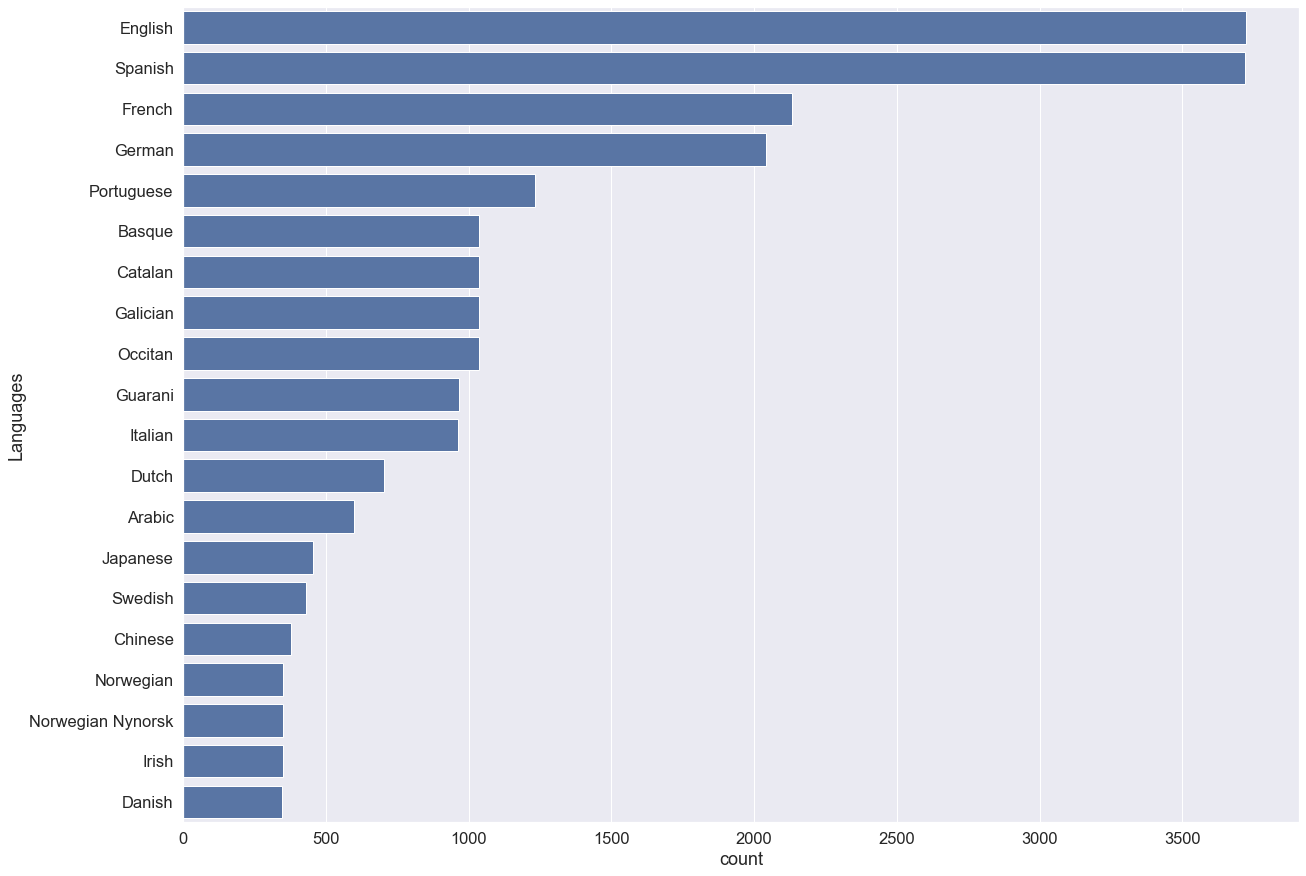

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

count = fifa20_langs.Languages.value_counts().index
#
number_of_countries = 20
sns.set(font_scale=1.5)
std_colors = sns.color_palette()
plt.figure(figsize=(20,15))
#
sns.countplot(y='Languages', data=fifa20_langs, color=std_colors[0], 
              order=count[:number_of_countries])
plt.show()

> And now, removing the languages already included in the game.

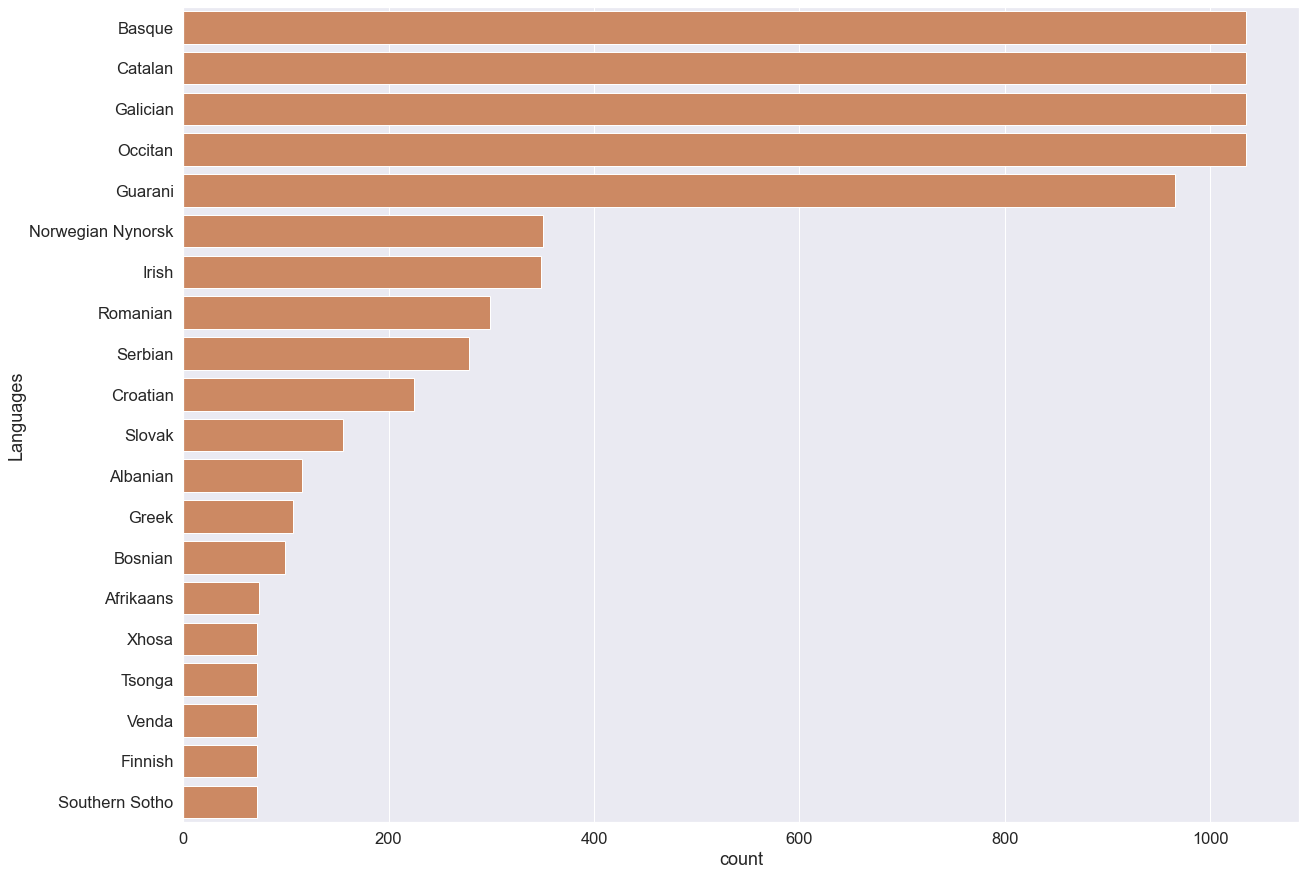

In [10]:
count = fifa20_langs.Languages.value_counts().index
count = [x for x in count if x not in langs_in_fifa20] # remove langs in game
#
number_of_countries = 20
sns.set(font_scale=1.5)
std_colors = sns.color_palette()
plt.figure(figsize=(20,15))
#
sns.countplot(y='Languages', data=fifa20_langs, color=std_colors[1], 
              order=count[:number_of_countries])
plt.show()

Now, several comments are in order: 

> * First, we are assuming that all Spanish players speak Basque, Catalan, and Galician, which is clearly not true. In fact, Catalan (or Valencian) is spoken by 19%, Galician by 5%, and Basque by 2% of the population in Spain. [[Ref.](https://en.wikipedia.org/wiki/Languages_of_Spain)]
>
> * Occitan, spoken in Southern France, Monaco, Italy's Occitan Valleys, as well as Spain's Val d'Aran, has a range from 100,000 to 800,000 total native speakers. [[Ref.](https://en.wikipedia.org/wiki/Occitan_language)]
>
> * Guarani is an indigenous language of South America. It is one of the official languages of Paraguay, where it is spoken by the majority of the population. It is also spoken by communities in neighboring countries, including parts of northeastern Argentina, southeastern Bolivia and southwestern Brazil, and is a second official language of the Argentine province of Corrientes. It has 4.85 million (cited in 1995) native speakers though. [[Ref.](https://en.wikipedia.org/wiki/Guarani_language)]
>
> * Nynorsk is one of the two written standards of the Norwegian language. [[Ref.](https://en.wikipedia.org/wiki/Nynorsk)]
>
> * Although English is the more common first language elsewhere in Ireland, Irish is spoken as a first language in substantial areas. The official status of the Irish language remains high in the Republic of Ireland, and the total number of people who answered 'yes' to being able to speak Irish in April 2016 was 1,761,420, which represents 39.8 per cent of respondents out of a population of 4,921,500 (2019 estimate) in the Republic of Ireland. In Northern Ireland 104,943 identify as being able to speak Irish out of a population of 1,882,000 (2018 estimate). [[Ref.](https://en.wikipedia.org/wiki/Irish_language)]

Taking into account these facts, we will take the following considerations:

> * For Catalan speakers, we will only keep Spanish players playing in FC Barcelona, mainly due to their policy of teaching Catalan to their players. [[Ref.](https://www.spainforpleasure.com/2015/12/06/5-things-you-never-knew-about-fc-barcelona/)]
>
> * For Guarani speakers, we will only keep Paraguayan players as the language is spoken by the majority of the population alike in the rest of the countries.
>
> * We keep all Irish speakers.
>
> * We drop Basque, Galician, Occitan and Nynorsk.

And keep all the rest of languages with fewer speakers.

In [11]:
fifa20_short = fifa20_langs.copy()

# drop languages already in the game
for lang in langs_in_fifa20:
    fifa20_short = fifa20_short[fifa20_short.Languages!=lang]
    
# drop 'Basque', 'Galician', 'Occitan', 'Norwegian Nynorsk'
lang_todrop = ['Basque', 'Galician', 'Occitan', 'Norwegian Nynorsk']
for lang in lang_todrop:
    fifa20_short = fifa20_short[fifa20_short.Languages!=lang]

# keep Guarani only for Paraguayans
mask1 = fifa20_short.Nationality!='Paraguay'
mask2 = fifa20_short.Languages=='Guarani'
mask = fifa20_short[(mask1) & (mask2)].index
fifa20_short.drop(index=mask, inplace=True)

# remove all catalan speakers that do not play in FC Barcelona
mask3 = fifa20_short.Languages=='Catalan'
mask4 = fifa20_short.Club!='FC Barcelona'
mask = fifa20_short[(mask3) & (mask4)].index
fifa20_short.drop(index=mask, inplace=True)
#
fifa20_short.head()

,Name,Nationality,Club,Score,International_reputation,Languages
4,J. Oblak,Slovenia,Atlético Madrid,91,3,Slovenian
13,L. Modrić,Croatia,Real Madrid,90,4,Croatian
37,Sergio Busquets,Spain,FC Barcelona,89,4,Catalan
52,Piqué,Spain,FC Barcelona,88,4,Catalan
55,S. Handanovič,Slovenia,Inter,88,3,Slovenian


### 1.2 International reputation
---

In this part, we want to make an analysis of the players' __international reputation__ given their language.
> International Reputation, also known as International Recognition, is an attribute that affects the player’s rating according to his club’s local and international prestige. It is based essentially on the popularity, history and results of them both. Basically, IR was created in order to adjust the players’ rating relatively to everything that doesn’t actually have to do with his technical, physical and mental capacities. It converges artificially so that the players who have the most fans around the world always get the highest ratings, but in practice there is no real effect. [[Ref.](https://www.fifauteam.com/fifa-18-player-ratings-guide-ultimate-team/)]

In [12]:
# count number of players for each language
fifa_count = fifa20_short.groupby('Languages').count()
fifa_count = fifa_count.rename(columns={'Name':'Count'})
fifa_count = fifa_count[['Count']]
fifa_count.reset_index(inplace=True)

# compute the International_reputation mean for each language
fifa_mean = fifa20_short.groupby('Languages').mean()
fifa_mean.reset_index(inplace=True)

# join both datasets
fifa_rep = pd.merge(fifa_mean, fifa_count, on='Languages')
fifa_rep.sort_values(by='International_reputation', ascending=False, 
                     inplace=True)
fifa_rep.reset_index(drop=True, inplace=True)
fifa_rep.drop('Score', axis=1, inplace=True)

#
fifa_rep.head(12)

,Languages,International_reputation,Count
0,Catalan,1.666667,15
1,Sango,1.250000,4
2,Kirundi,1.250000,4
3,Slovenian,1.229508,61
4,Croatian,1.222222,225
5,Bosnian,1.191919,99
6,Hungarian,1.171429,35
7,Estonian,1.166667,6
8,Greek,1.158879,107
9,Armenian,1.157895,19


> We finally came to a relation of the languages not included yet in the video game which are ordered by the player's mean international reputation.
>
> Looking at it, we could safely disregard Sango and Kirundi given the low sample count which clearly can introduce a bias.
>
> And can conclude that __Catalan__, __Slovenian__, __Croatian__, __Bosnian__ and __Hungarian__ are the most prominent languages.

Let's make a final visualization by localizing these languages in a map: larger and brighter circles represent higher international reputation.

In [13]:
# sort languages by speakers number
fifa_rep_countries = fifa20_langs.groupby(['Languages', 'Nationality']).count()
fifa_rep_countries.reset_index(inplace=True)
fifa_rep_countries.sort_values(by='Name', ascending=False, inplace=True)

# get countries for each language in number-of-speakers order
countries = []
for lang in fifa_rep.Languages:
    nat = fifa_rep_countries[fifa_rep_countries.Languages==lang]['Nationality']
    countries.append(nat.values[0])
fifa_rep['Countries'] = countries

# get codes
codes = []
for count in fifa_rep.Countries:
    code = countries_lang[countries_lang.Country_name==count]['Country_code']
    codes.append(code.values[0])
fifa_rep['Codes'] = codes

# normalize International_reputation in [0,1]
fifa_rep['International_reputation'] = (fifa_rep['International_reputation'] \
                                        - 1) / 0.666667

In [14]:
fig = px.scatter_geo(fifa_rep, locations='Codes', 
                     color='International_reputation', 
                     size='International_reputation', size_max=40, 
                     hover_name='Languages', hover_data=['Countries', 'Count'],
                     template='seaborn', projection="natural earth",
                     title="Players' international reputation by " \
                             "language and number (Count) of speakers")
fig.update_geos(resolution=110, showcountries=True)
fig.show()

## Twitter analysis
---

In [15]:
tweets = pd.read_csv('Twitter/Tweets_cleaned.csv', index_col=0)

tweets.head()

,text,text_english,sentiment,language,location
0,PLEASE IF Y'ALL COULD SHARE I'D REALLY APPRECI...,PLEASE if COULD share really APPRECIATE it pla...,0.9263,English,NaN
1,"FIFA 20 TOTW 27 Prediction – De Bruyne, Lewand...",FIFA TOTW prediction De Bruyne Lewandowski amp...,0.0000,Dutch,USA
2,FIFA 21 стала самой дорогой игрой в PSN. Она с...,FIFA has become the most expensive game on PSN...,0.5267,Russian,RUS
3,➸ New Montage #FIFA20\n➸ Position : R\LB\n➸ ¦ ...,New Montage position designer ME Enjoy to watch,0.4939,English,NaN
4,سحب على FIFA21 او قيمتها 60$ 🔥\nالشروط بسيطه:\...,Pull on the value or conditions continued Rthu...,0.6597,Arabic,NaN
